## Import necessary python modules

In [1]:
import multiprocessing
from copy import deepcopy as dc
from os import path
from typing import Tuple

import import_ipynb
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from helpful_functions import *
from streakimage import StreakImage
import find_outliers
from pathlib import Path

importing Jupyter notebook from helpful_functions.ipynb


## Load source files

In [2]:
folder = Path("files/camera_correction/").absolute()

The following cell loads six files (one for each time range) and their backgrounds. Inside the loops Python's f-string are used. *f* stands for *format*. A string variable wrapped in braces is replaced by its value.

In [3]:
bg_dict = {}

for tr in range(1, 7):
    bg_dict[f"bg_ST{tr}_g10_100x2002ms"] = StreakImage(
        path.join(folder, f"corr file bg gain10 ST{tr} 100x2s.img")
    )

img_dict = {}

for tr in range(1, 7):
    img_dict[f"ST{tr}_correction"] = StreakImage(
        path.join(folder, f"corr file slit60 gain10 ST{tr} 100x2s.img"),
        bg_dict=bg_dict,
        title=f"ST{tr} corr",
    )

## Plot images

In [4]:
# def get_mean(df: pd.DataFrame, poi: Tuple[int]) -> Tuple[float]:
#     """
#     Returns the mean and standard deviation of df without poi.
#     """
#     values = [val for ar in df.values for val in ar]
#     values.remove(
#         df.iloc[poi]
#     )  # remove value of point of interest, only once if contained multiple times
#     val_array = np.array(values)
#     return (val_array.mean(), val_array.std())


# def find_outliers(df: pd.DataFrame, stdev_factor=4.0, window_size: int = 2):
#     """
#     Finds ouliers and replace them with the mean value of their environment.

#     Each cell in the dataframe is compared to its environment. The environment comprises the window_size rows and columns arround the cell.
#     The mean of the environment (without the value of the cell) is calculated and if the value of the cell deviated more than stdev_factor standard deviations from that mean, it is replaced by the mean.

#     Parameters:
#         df (pd.DataFrame): The DataFrame to digest.
#         stdev_factor (float): The factor for the standard deviation.
#         window_size (int): The size of the environment.
#     """
#     df_new = dc(df)
#     for idx in range(0, df.shape[0]):
#         #         print(df.index[idx],"\n")
#         for col in range(0, df.shape[1]):
#             #             print(df.columns[col])
#             a = idx - window_size if idx - window_size > 0 else 0
#             b = idx + window_size + 1
#             c = col - window_size if col - window_size > 0 else 0
#             d = col + window_size + 1
#             subset = df.iloc[a:b, c:d]

#             poi = (
#                 idx if idx < window_size else window_size,
#                 col if col < window_size else window_size,
#             )
#             env_mean, env_std = get_mean(subset, poi)

#             #             print(poi)
#             #             print(subset)
#             #             print("")
#             #             print(df.iloc[idx,col],env_mean, env_std)
#             if (
#                 df.iloc[idx, col]
#                 > max(
#                     env_mean + (env_std * stdev_factor),
#                     env_mean - (env_std * stdev_factor),
#                 )
#                 or df.iloc[idx, col]
#                 < min(
#                     env_mean + (env_std * stdev_factor),
#                     env_mean - (env_std * stdev_factor),
#                 )
#                 or df.iloc[idx, col] < 0
#             ):
#                 df_new.iloc[idx, col] = env_mean
#     #         print("")
#     return df_new

In [6]:
# %%timeit
# img_dict_corr = dc(img_dict)
# for key in img_dict_corr:
#     img_dict_corr[key].data = find_outliers_mt(
#         img_dict_corr[key].data, stdev_factor=4, window_size=2, name=key
#     )

28.9 ms ± 296 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
# %%timeit

# img_dict_corr = dc(img_dict)
# format = "%(asctime)s: %(message)s"
# logging.basicConfig(format=format, level=logging.INFO, datefmt="%H:%M:%S")

# args = ((img_dict_corr[key].data, 4, 2, key) for key in img_dict_corr)

# with concurrent.futures.ThreadPoolExecutor(max_workers=1) as excecutor:
#     excecutor.map(lambda p: find_outliers_mt(*p), args)

13.1 s ± 15.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
# %%timeit

# img_dict_corr = dc(img_dict)
# format = "%(asctime)s: %(message)s"
# logging.basicConfig(format=format, level=logging.INFO, datefmt="%H:%M:%S")

# args = ((img_dict_corr[key].data, 4, 2, key) for key in img_dict_corr)

# with concurrent.futures.ThreadPoolExecutor(max_workers=6) as excecutor:
#     excecutor.map(lambda p: find_outliers_mt(*p), args)

13.8 s ± 43.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# %%timeit

# img_dict_corr = dc(img_dict)
# format = "%(asctime)s: %(message)s"
# logging.basicConfig(format=format, level=logging.INFO, datefmt="%H:%M:%S")

# args = ((img_dict_corr[key].data, 4, 2, key) for key in img_dict_corr)
# jobs = []

# for args_ in args:

#     p = multiprocessing.Process(target=test_xx, args=args_)
#     jobs.append(p)
#     p.start()

# for job in jobs:
#     job.join()

# # with concurrent.futures.ThreadPoolExecutor(max_workers=6) as excecutor:
# #     excecutor.map(lambda p: find_outliers_mt(*p), args)

In [8]:
# %%time

# img_dict_corr = dc(img_dict)

# if __name__ == "__main__":
#     num_processors = 6
#     p = multiprocessing.Pool(processes=num_processors)
#     args = ((img_dict_corr[key], 4, 2, key) for key in img_dict_corr)
#     output = p.map(
#         find_outliers.find_outliers_mp, args
#     )
#     for tpl in output:
#         img_dict_corr[tpl[0]]=tpl[1]

Wall time: 1min


In [8]:
def correct_outliers(img_dict: dict) -> dict:
    img_dict_corr = dc(img_dict)

    if __name__ == "__main__":
        num_processors = 6
        p = multiprocessing.Pool(processes=num_processors)
        args = ((img_dict_corr[key].data, 4, 2, key) for key in img_dict_corr)
        output = p.map(
            find_outliers.find_outliers_mp, args
        )
        for tpl in output:
            img_dict_corr[tpl[0]].data=tpl[1]
    return img_dict_corr

In [10]:
img_dict_corr = correct_outliers(img_dict)

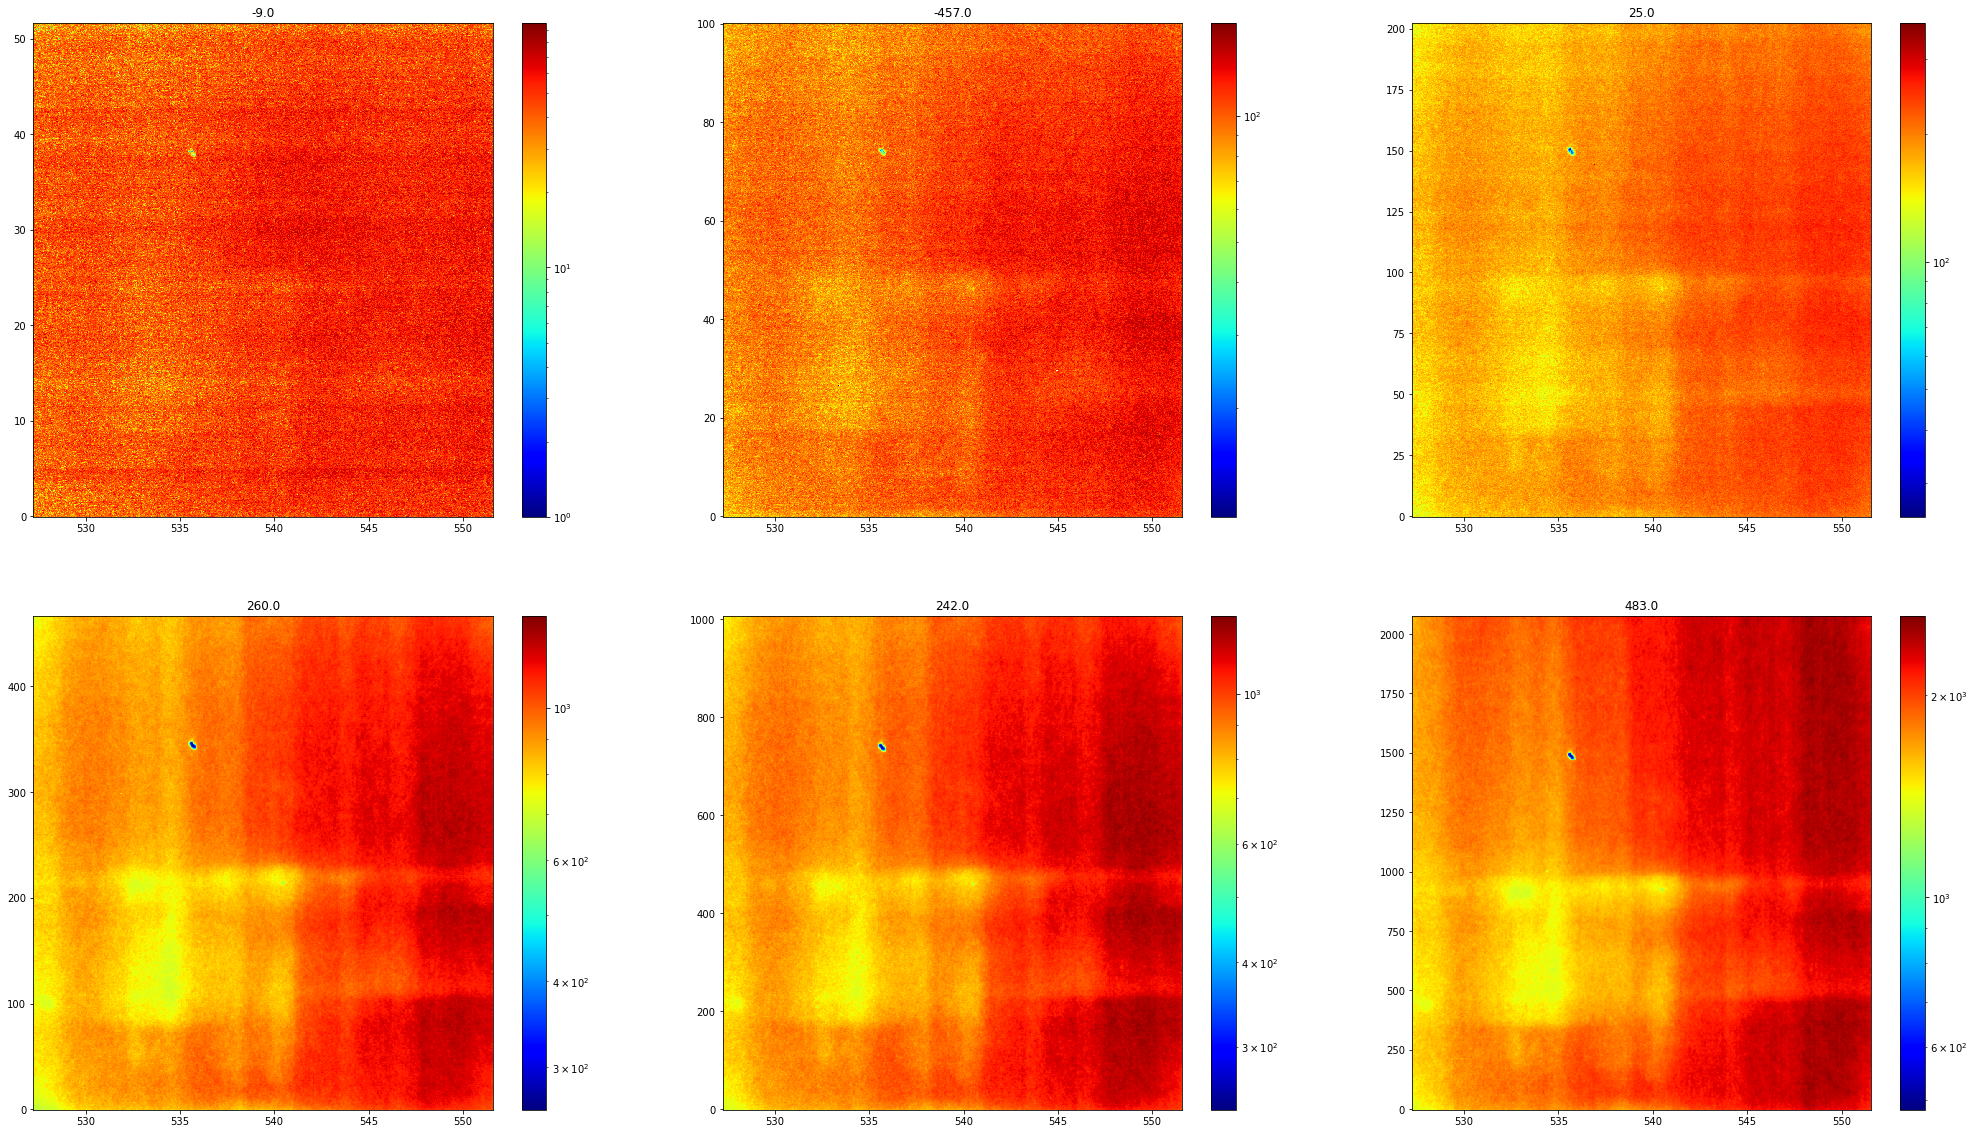

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(35, 20))
axes_list = [ax for row in axes for ax in row]
axes_iter = iter(axes_list)

for key in img_dict:
    img = img_dict[key]
    ax = next(axes_iter)
    plot_heatmap(df=img.data, fig=fig, ax=ax, title=img.data.min().min())

In [6]:
# %%time
# img_dict_corr = dc(img_dict)
# for key in img_dict_corr:
#     img_dict_corr[key].data = find_outliers(
#         img_dict_corr[key].data, stdev_factor=4, window_size=2
#     )

Wall time: 5min 23s


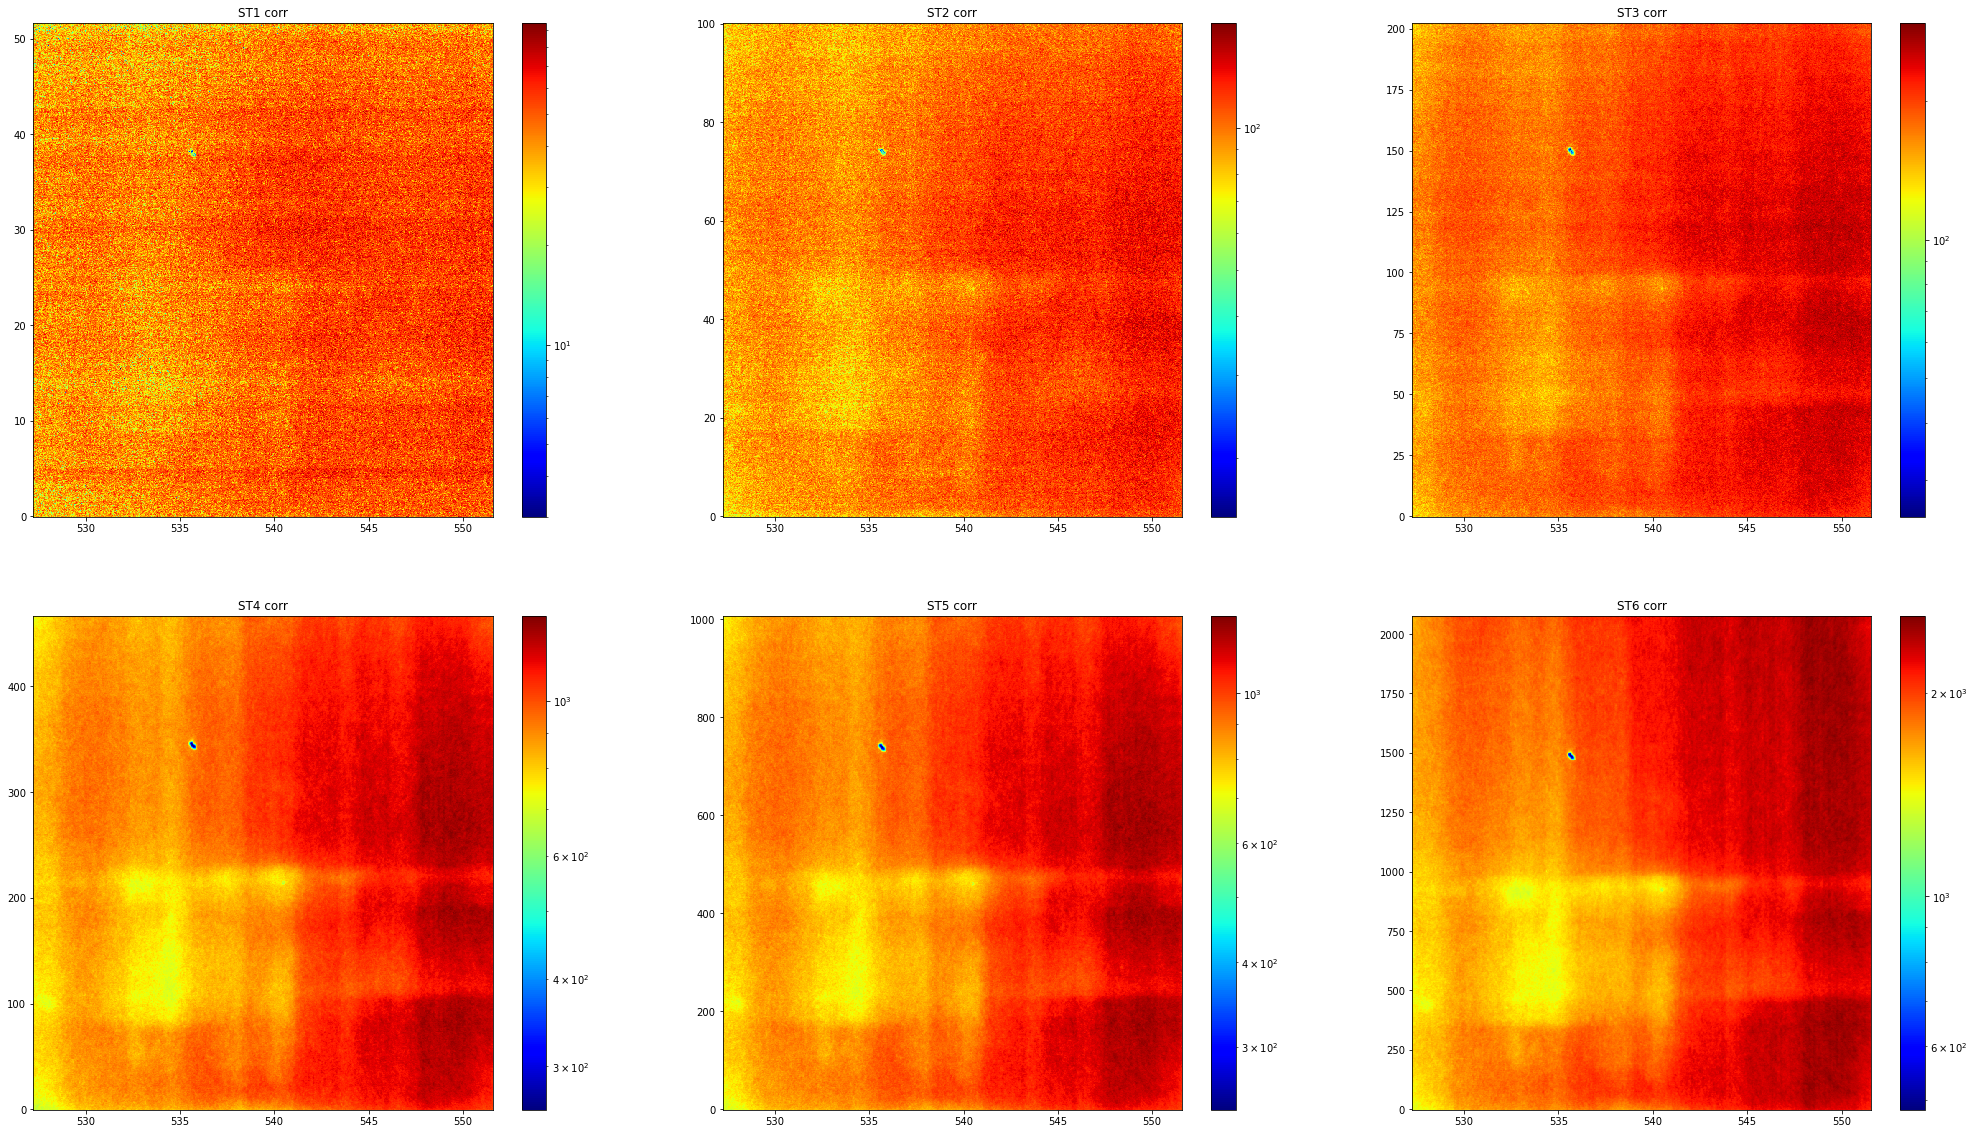

In [11]:
fig_corr, axes_corr = plt.subplots(2, 3, figsize=(35, 20))
axes_list = [ax for row in axes_corr for ax in row]
axes_iter = iter(axes_list)

for key in img_dict_corr:
    img = img_dict_corr[key]
    ax = next(axes_iter)
    plot_heatmap(df=img.data, fig=fig_corr, ax=ax, title=img.title)

## Check Dead Pixel (position may change)

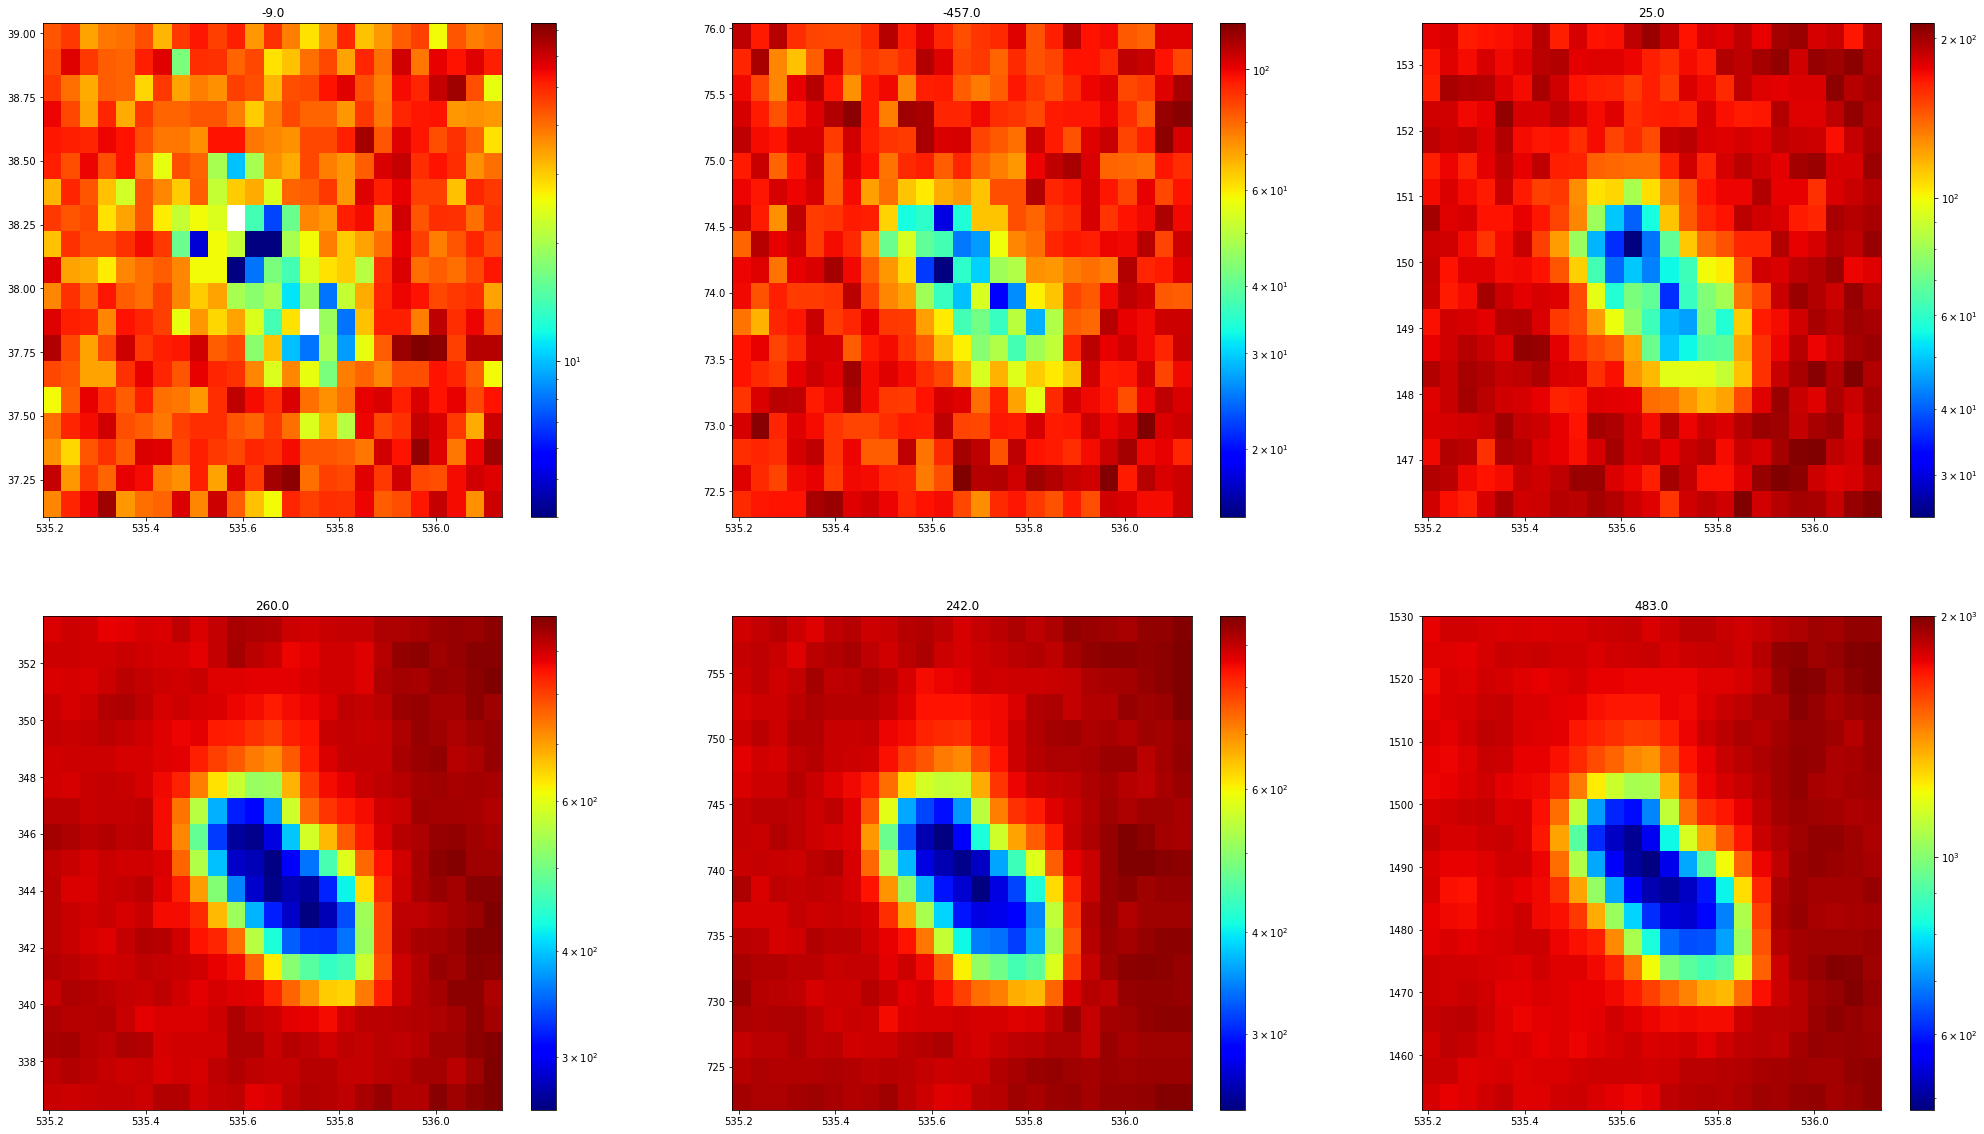

In [12]:
fig_zoom, axes_zoom = plt.subplots(2, 3, figsize=(35, 20))
axes_list = [ax for row in axes_zoom for ax in row]
axes_iter = iter(axes_list)

for key in img_dict:
    img = img_dict[key]
    ax = next(axes_iter)
    plot_heatmap(
        df=img.data.iloc[370:389, 209:234],
        fig=fig_zoom,
        ax=ax,
        title=img.data.min().min(),
    )

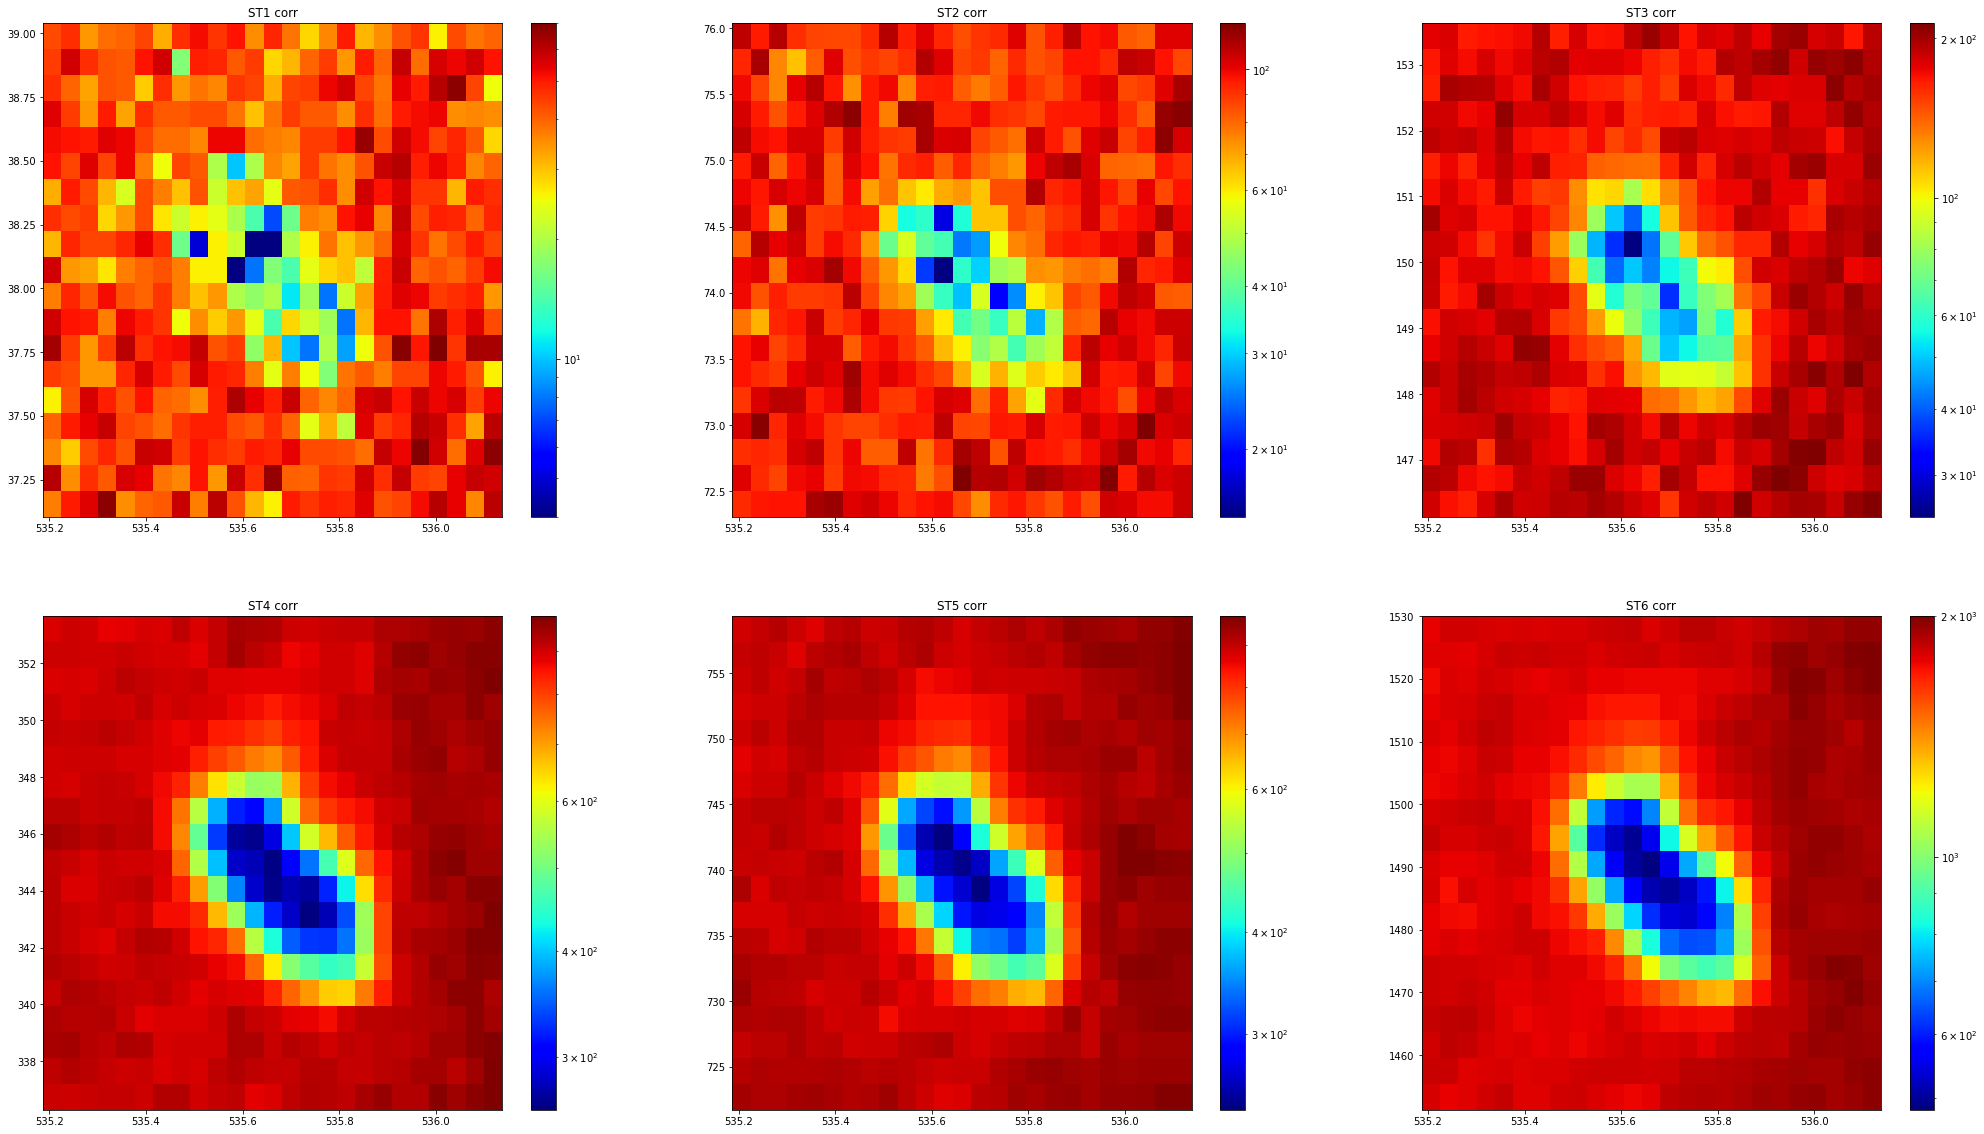

In [14]:
fig_corr_zoom, axes_corr_zoom = plt.subplots(2, 3, figsize=(35, 20))
axes_list = [ax for row in axes_corr_zoom for ax in row]
axes_iter = iter(axes_list)

for key in img_dict_corr:
    img = img_dict_corr[key]
    ax = next(axes_iter)
    plot_heatmap(
        df=img.data.iloc[370:389, 209:234], fig=fig_corr_zoom, ax=ax, title=img.title
    )

### Export before and after pictures for comparison

In [11]:
# fig.savefig("./blob/uncorrected.png")
# fig_corr.savefig("./blob/corrected.png")

# fig_zoom.savefig("./blob/zoom_uncorrected.png")
# fig_corr_zoom.savefig("./blob/zoom_corrected.png")

## Normalize data

Check histogram

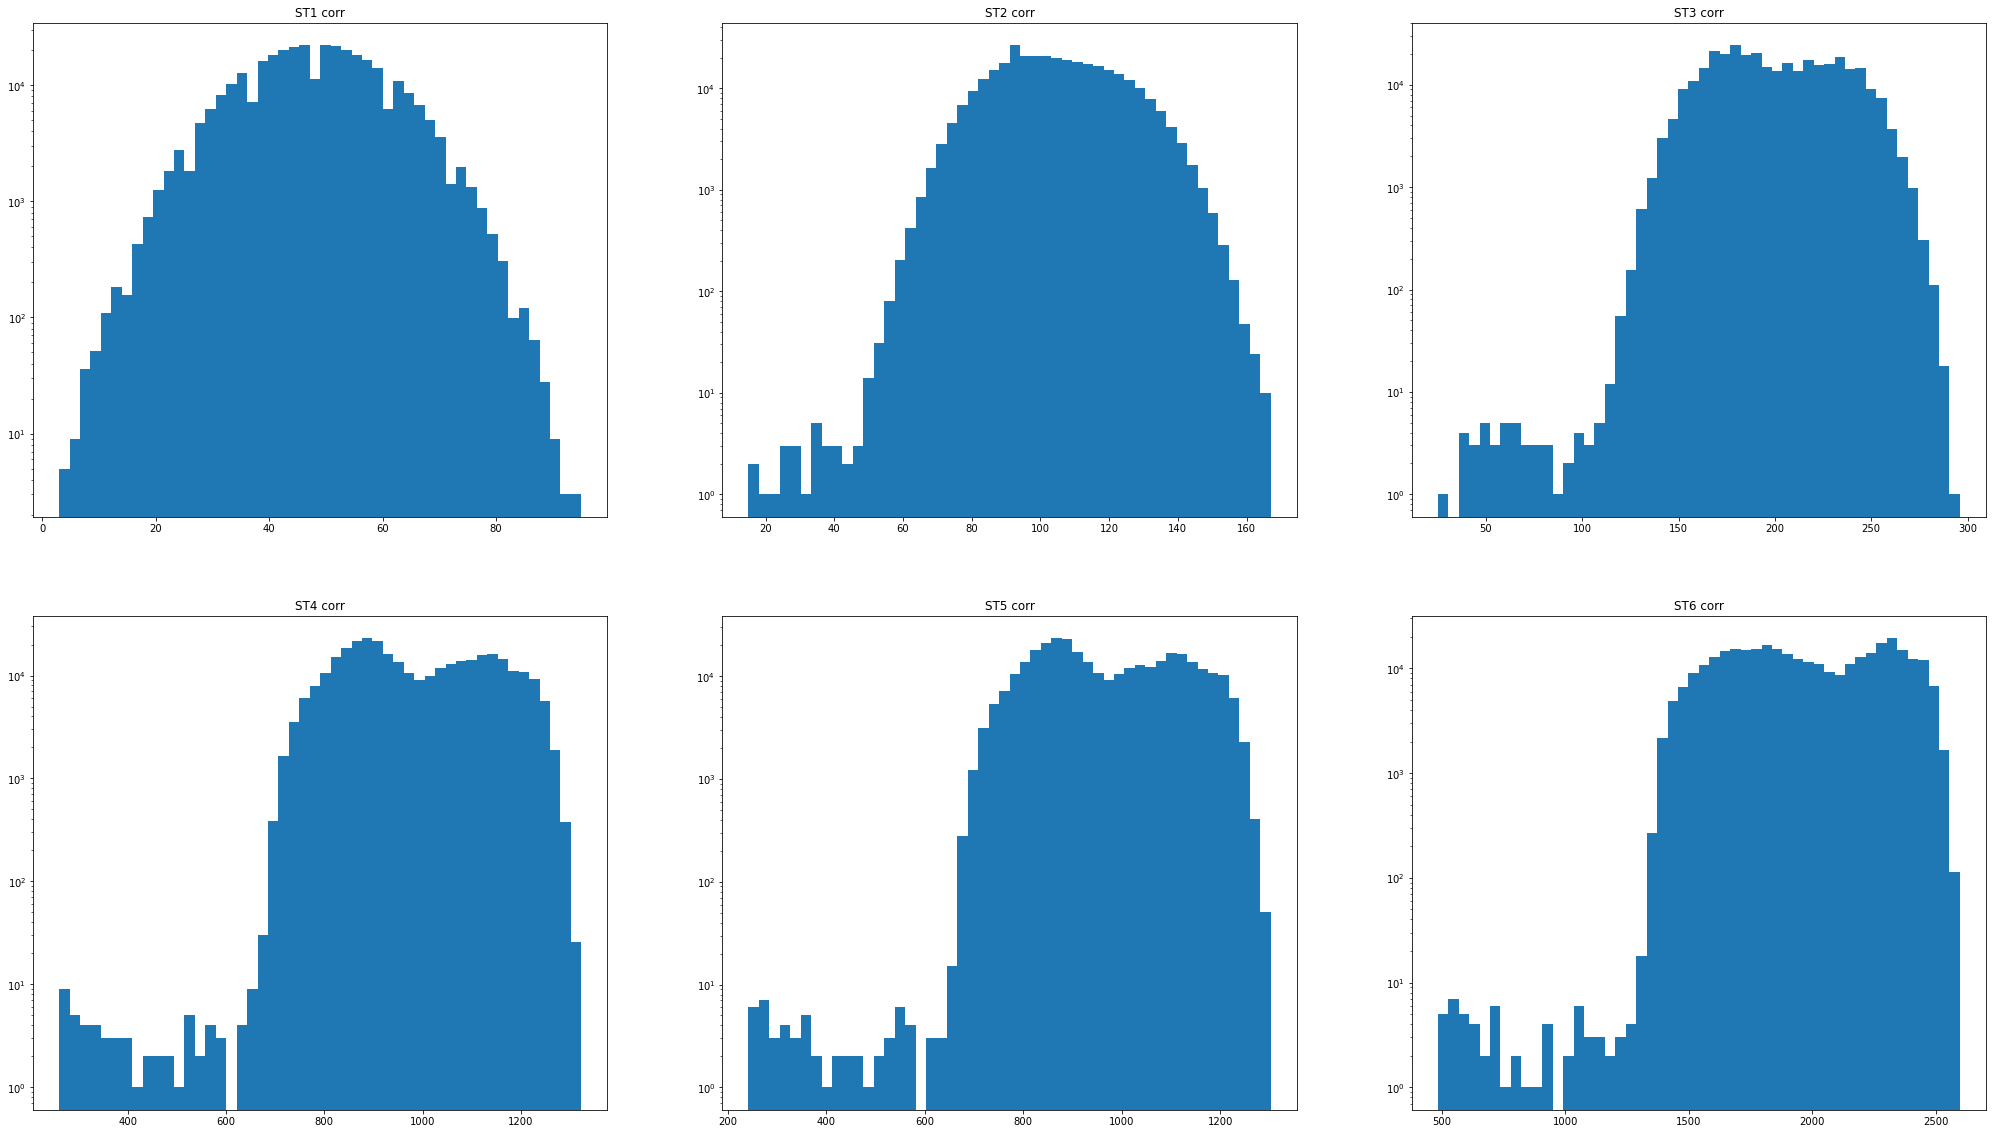

In [15]:
fig_hist, axes_hist = plt.subplots(2, 3, figsize=(35, 20))
axes_list = [ax for row in axes_hist for ax in row]
axes_iter = iter(axes_list)

for key in img_dict_corr:
    img = img_dict_corr[key]

    vals = [val for ar in img.data.values for val in ar]

    ax = next(axes_iter)
    n, bins, patches = ax.hist(vals, bins=50)
    ax.set_title(img.title)
    ax.set_yscale("log")

In [16]:
img_dict_corr_norm = dc(img_dict_corr)
for key in img_dict_corr_norm:
    df = img_dict_corr_norm[key].data
    df_max = df.max().max()
    #     df_min = df.min().min()
    #     df_mean = df.mean().mean()
    img_dict_corr_norm[key].data /= df_max
#     img_dict[key].data = df/df_mean

## Plot normalized data

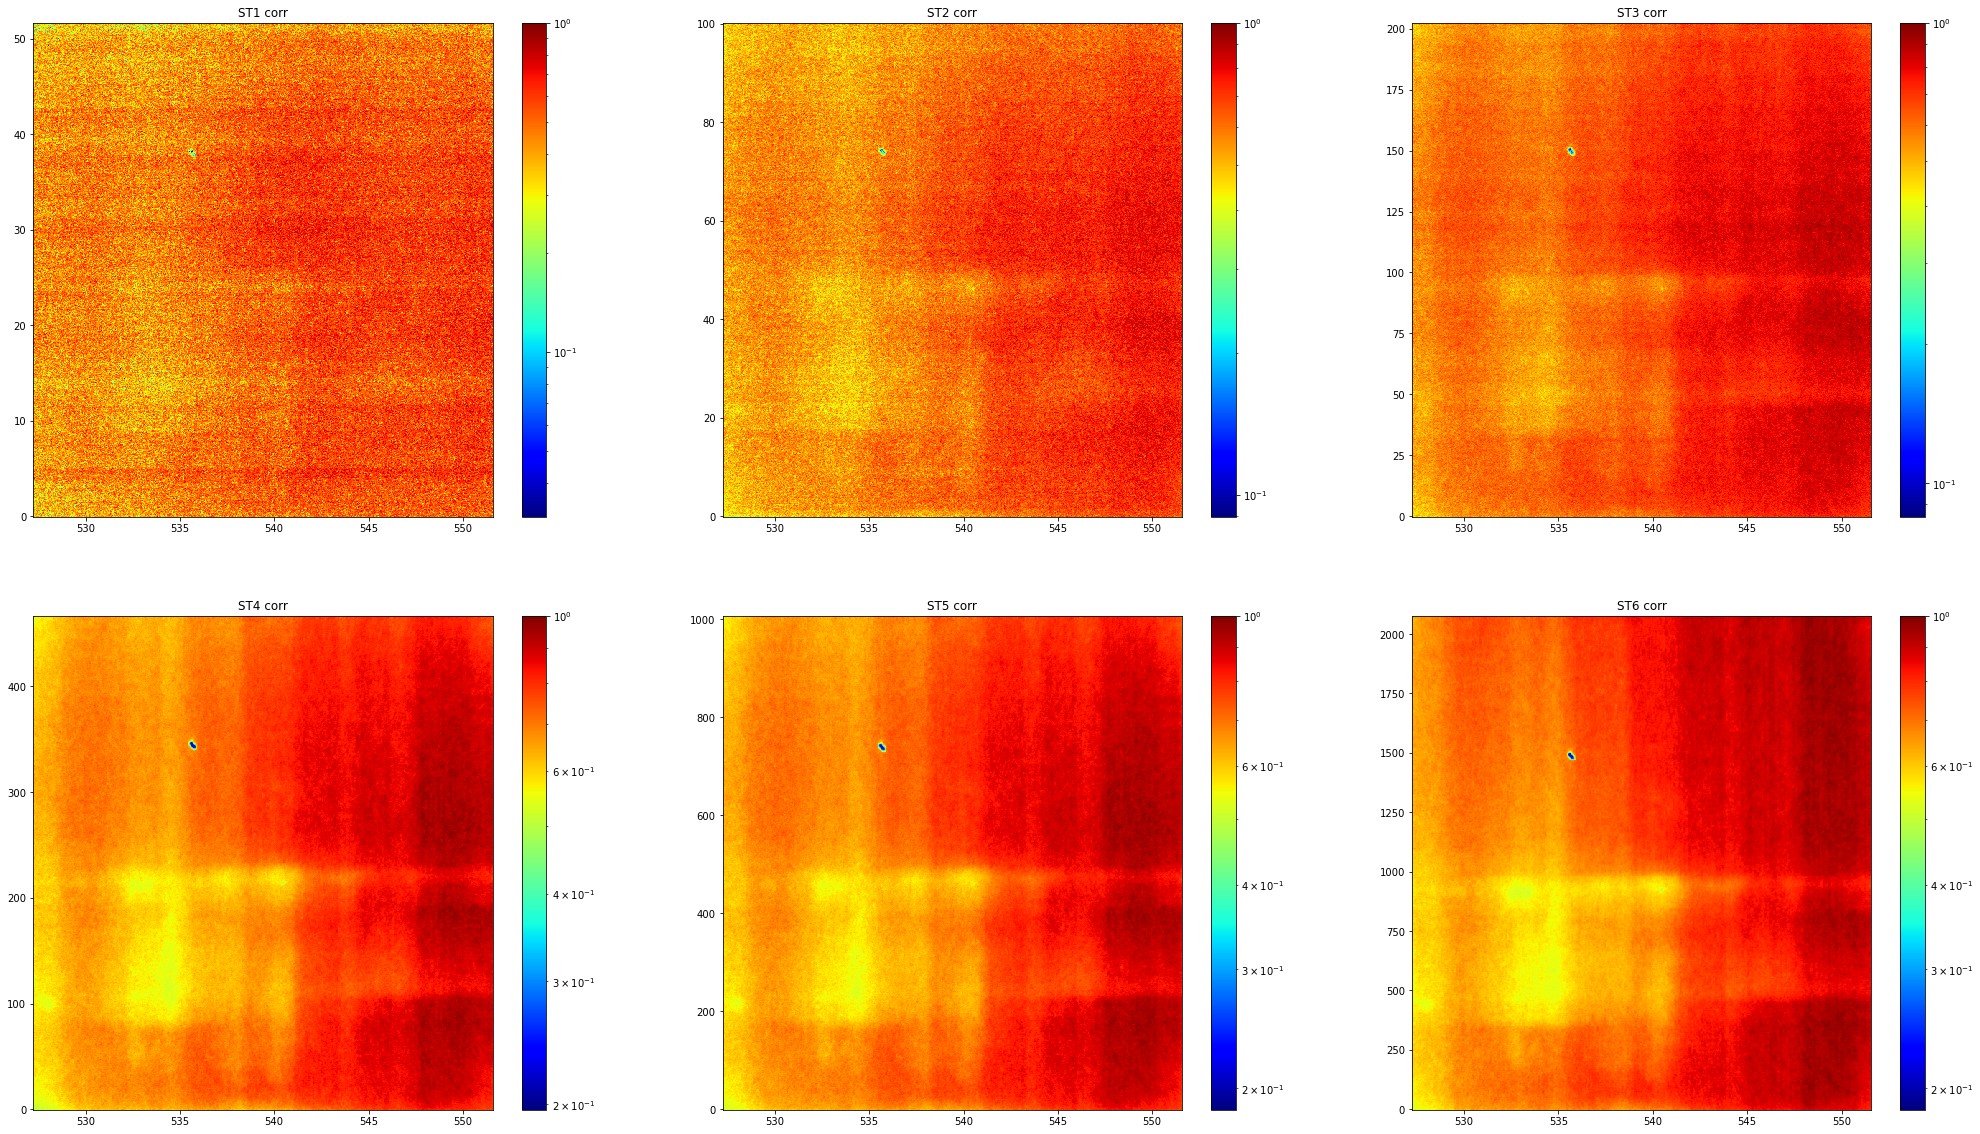

In [17]:
fig_norm, axes_norm = plt.subplots(2, 3, figsize=(35, 20))
axes_list = [ax for row in axes_norm for ax in row]
axes_iter = iter(axes_list)

for key in img_dict_corr_norm:
    img = img_dict_corr_norm[key]
    ax = next(axes_iter)
    plot_heatmap(df=img.data, fig=fig_norm, ax=ax, title=img.title)

## Test corrections - WIP

Load files to test the corrections on. This is another series of white light images.

In [ ]:
WIP

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes_list = [ax for row in axes for ax in row]
axes_iter = iter(axes_list)

## Export matrices as NumPy files
Note: All information about the original image, including the x- and y-axes, will be ommited.

In [ ]:
prefix = "202004"  # A unique id for the correction matrix. The simplest aproach is to use the year and month of the image but any arbitrary id is possible.
folder = "./files/camera_correction/"
for key in img_dict:
    img = img_dict[key]
    path_ = path.join(folder, f"{prefix}_{key}_{img.width}x{img.height}")
    np.save(path_, img.data.values)

Refer to the README of [StreakImage](https://github.com/nicohofdtz/streakimage) for information on where to place the created correction files and how to include them in the config.